![Swiggy Logo](https://i.imgur.com/YvwXWFZ.png)

## EXPLORATORY DATA ANALYSIS:

Exploratory data analysis (EDA for short) is what data analysts do with large sets of data, looking for patterns and summarizing the dataset’s main characteristics beyond what they learn from modeling and hypothesis testing. EDA is a philosophy that allows data analysts to approach a database without assumptions. When a data analyst employs EDA, it’s like they’re asking the data to tell them what they don’t know.

## PROJECT OUTLINE AND STEP TO FOLLOWS:

**Select a real-world dataset**

**Perform data preparation & cleaning**

**Perform exploratory analysis & visualization**

**Ask & answer questions about the data**

**Summarize your inferences & write a conclusion**

## SELECT A REAL-WORLD DATASET

#### Details of Datasets **[Swiggy's Restaurants](https://www.kaggle.com/datasets/ashishjangra27/swiggy-restaurants-dataset)** From [Kaggle](https://www.kaggle.com/)

- Swiggy is an **Indian online food ordering and delivery platform**. 

- **Founded in 2014**, Swiggy is based in Bangalore and operates in 500 Indian cities as of September 2021.

- Swiggy reported an average of **1.4 million orders in a day of 2019**

- **Swiggy's Process** provides an online platform for ordering from a wide range of listed neighbourhood partner restaurants and has its own fleet of delivery personnel who pick up the orders from the partner restaurants and deliver them to the customers at their doorsteps.

Link to click the dataset: https://www.kaggle.com/datasets/ashishjangra27/swiggy-restaurants-dataset

### Installing the Libraries

In [1]:
!pip install matplotlib seaborn --upgrade --quiet
!pip install plotly --upgrade --quiet
!pip install ipywidgets --upgrade --quiet
!pip install opendatasets jovian --quiet --upgrade

### Importing the Libraries

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import jovian

%matplotlib inline

#### Let's start downloading the dataset from `kaggle`.

In [3]:
data_url = 'https://www.kaggle.com/datasets/ashishjangra27/swiggy-restaurants-dataset'

In [4]:
od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kriven0814
Your Kaggle Key: ········


100%|██████████| 141M/141M [00:05<00:00, 29.1MB/s] 


In [5]:
data_name = './swiggy-restaurants-dataset/swiggy.csv'

#### Import `pandas` library to read `csv` files

In [6]:
df = pd.read_csv(data_name)

In [7]:
df.sample(5)

id                      name                   city rating  \
143825   99055          kothi restaurant                Udaipur     --   
7514    336769                MOMO AMRIT                Asansol    4.5   
19073   151225                  Satisfry     Majestic,Bangalore     --   
58172   319002  SPICE N SEEKH RESTAURANT      Indirapuram,Delhi     --   
89806   526349              SANKAR S FRY  South Kolkata,Kolkata     --   

           rating_count   cost               cuisine          lic_no  \
143825  Too Few Ratings  ₹ 300          North Indian  22218019002961   
7514        20+ ratings  ₹ 150               Chinese  22820030001084   
19073   Too Few Ratings  ₹ 260             Beverages  21219189000139   
58172   Too Few Ratings  ₹ 400  North Indian,Chinese  22721692001002   
89806   Too Few Ratings  ₹ 250         Indian,Snacks  22821043000522   

                                                     link  \
143825  https://www.swiggy.com/restaurants/kothi-resta...   
7514    https://www.swiggy.com/restaurants/momo-amrit-...   
19073   https://www.swiggy.com/restaurants/satisfry-ch...   
58172   https://www.swiggy.com/restaurants/spice-n-see...   
89806   https://www.swiggy.com/restaurants/sankar-s-fr...   

                                                  address              menu  
143825  kothi restaurant, NEAR UMAID VILLA HOTEL, JAIS...   Menu/99055.json  
7514    MOMO AMRIT, KAUSTAV NARAYAN GORAI, 30, G.T. RO...  Menu/336769.json  
19073   Satisfry, Metro cash and Carry, ETA Mall, Hosa...  Menu/151225.json  
58172   SPICE N SEEKH RESTAURANT, SD 121 Jaipuria Plaz...  Menu/319002.json  
89806   SANKAR S FRY, 144,JHEEL ROAD(BANK PLOT)-PARK,1...  Menu/526349.json

## PERFORM DATA PREPARATION AND CLEANING

#### To view the labels of columns by using `columns`

In [8]:
df.columns

Index(['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine',
       'lic_no', 'link', 'address', 'menu'],
      dtype='object')

From the above, remove the unwanted columns by selecting the columns for further process

In [9]:
column_1 = ['id', 'name', 'city', 'cuisine', 'cost', 'rating', 'rating_count', 'address']

In [10]:
df = df[column_1]

In [11]:
df.sample(5)

id                       name                      city  \
34791   341243          BARRELS & BURGERS          Mylapore,Chennai   
126522   38806                Bread Story              Bavdhan,Pune   
72020   388730          A.M.TIFFIN CENTRE  Himayath Nagar,Hyderabad   
118148  192775  Jackfruit Kitchen and Bar                 North-goa   
118423  122968           Abad Hot Chicken                      Ooty   

                      cuisine   cost rating     rating_count  \
34791   Continental,Beverages  ₹ 300     --  Too Few Ratings   
126522                 Bakery  ₹ 200    4.0      50+ ratings   
72020            South Indian  ₹ 150    4.3     100+ ratings   
118148      Goan,North Indian  ₹ 300    4.3      20+ ratings   
118423                 Indian  ₹ 300    4.0     100+ ratings   

                                                  address  
34791   BARRELS & BURGERS, NO 28 SHANMUGAM PILLAI STRE...  
126522  Bread Story, 114/2, Radha Apartments, Bavdhan ...  
72020   A.M.TIFFIN CENTRE, A.M.Tiffin Center, Street n...  
118148  Jackfruit Kitchen and Bar, Chogm Road, Sangold...  
118423  Abad Hot Chicken, Commercial Road, Opposite to...

#### To returns the number of NaN values in all columns by using `.isna().sum()`

In [12]:
df.isna().sum()

id                0
name             86
city              0
cuisine          99
cost            131
rating           86
rating_count     86
address          86
dtype: int64

From the above, need to drop all the rows of `name`, `cuisine`, `cost`

In [13]:
df.dropna(subset = ['name','cuisine','cost'], inplace = True)

In [14]:
df

id                      name      city  \
0       567335            AB FOODS POINT    Abohar   
1       531342         Janta Sweet House    Abohar   
2       158203         theka coffee desi    Abohar   
3       187912                 Singh Hut    Abohar   
4       543530             GRILL MASTERS    Abohar   
...        ...                       ...       ...   
148536  553122          The Food Delight  Yavatmal   
148537  562647  MAITRI FOODS & BEVERAGES  Yavatmal   
148538  559435           Cafe Bella Ciao  Yavatmal   
148539  418989               GRILL ZILLA  Yavatmal   
148540  447770            Lazeez kitchen  Yavatmal   

                           cuisine   cost rating     rating_count  \
0                 Beverages,Pizzas  ₹ 200     --  Too Few Ratings   
1                    Sweets,Bakery  ₹ 200    4.4      50+ ratings   
2                        Beverages  ₹ 100    3.8     100+ ratings   
3                 Fast Food,Indian  ₹ 250    3.7      20+ ratings   
4       Italian-American,Fast Food  ₹ 250     --  Too Few Ratings   
...                            ...    ...    ...              ...   
148536            Fast Food,Snacks  ₹ 200     --  Too Few Ratings   
148537                      Pizzas  ₹ 300     --  Too Few Ratings   
148538            Fast Food,Snacks  ₹ 300     --  Too Few Ratings   
148539                 Continental  ₹ 250     --  Too Few Ratings   
148540                      Pizzas  ₹ 200     --  Too Few Ratings   

                                                  address  
0       AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...  
1       Janta Sweet House, Bazar No.9, Circullar Road,...  
2              theka coffee desi, sahtiya sadan road city  
3         Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR  
4       GRILL MASTERS, ADA Heights, Abohar - Hanumanga...  
...                                                   ...  
148536  The Food Delight, 94MC+X35, New Singhania Naga...  
148537  MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...  
148538  Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...  
148539  GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...  
148540  Lazeez kitchen, 94G3+2RR, Wadgaon, Yavatmal, M...  

[148398 rows x 8 columns]

The above dataset contains **148398 Rows** and **8 Columns**

#### Re-check once again if there any NaN missing values

In [15]:
df.isna().sum()

id              0
name            0
city            0
cuisine         0
cost            0
rating          0
rating_count    0
address         0
dtype: int64

Every column contains **null value** let's proceed further.

#### `info()` contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148398 entries, 0 to 148540
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148398 non-null  int64 
 1   name          148398 non-null  object
 2   city          148398 non-null  object
 3   cuisine       148398 non-null  object
 4   cost          148398 non-null  object
 5   rating        148398 non-null  object
 6   rating_count  148398 non-null  object
 7   address       148398 non-null  object
dtypes: int64(1), object(7)
memory usage: 10.2+ MB


In [17]:
df

id                      name      city  \
0       567335            AB FOODS POINT    Abohar   
1       531342         Janta Sweet House    Abohar   
2       158203         theka coffee desi    Abohar   
3       187912                 Singh Hut    Abohar   
4       543530             GRILL MASTERS    Abohar   
...        ...                       ...       ...   
148536  553122          The Food Delight  Yavatmal   
148537  562647  MAITRI FOODS & BEVERAGES  Yavatmal   
148538  559435           Cafe Bella Ciao  Yavatmal   
148539  418989               GRILL ZILLA  Yavatmal   
148540  447770            Lazeez kitchen  Yavatmal   

                           cuisine   cost rating     rating_count  \
0                 Beverages,Pizzas  ₹ 200     --  Too Few Ratings   
1                    Sweets,Bakery  ₹ 200    4.4      50+ ratings   
2                        Beverages  ₹ 100    3.8     100+ ratings   
3                 Fast Food,Indian  ₹ 250    3.7      20+ ratings   
4       Italian-American,Fast Food  ₹ 250     --  Too Few Ratings   
...                            ...    ...    ...              ...   
148536            Fast Food,Snacks  ₹ 200     --  Too Few Ratings   
148537                      Pizzas  ₹ 300     --  Too Few Ratings   
148538            Fast Food,Snacks  ₹ 300     --  Too Few Ratings   
148539                 Continental  ₹ 250     --  Too Few Ratings   
148540                      Pizzas  ₹ 200     --  Too Few Ratings   

                                                  address  
0       AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...  
1       Janta Sweet House, Bazar No.9, Circullar Road,...  
2              theka coffee desi, sahtiya sadan road city  
3         Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR  
4       GRILL MASTERS, ADA Heights, Abohar - Hanumanga...  
...                                                   ...  
148536  The Food Delight, 94MC+X35, New Singhania Naga...  
148537  MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...  
148538  Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...  
148539  GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...  
148540  Lazeez kitchen, 94G3+2RR, Wadgaon, Yavatmal, M...  

[148398 rows x 8 columns]

#### From the above `df` the columns are be change to the below datatypes

- **Cost to int**

- **rating to float**

- **rating_count to int**

In [18]:
df['rating'] = df['rating'].replace('--', '0.0').astype(float)

In [19]:
def rm_rating(row):
  x = row.rating_count.split()[0]
  if 'K+' in x:
    return int(x.replace('K+', ''))*1000
  elif '+' in x:
    return int(x.replace('+', ''))
  else:
    return int(x.replace('Too', '0'))

In [20]:
df['rating_count'] = df.apply(rm_rating, axis=1)

In [21]:
def rm_rupee_sign(row):
    return row.cost.split()[1]

In [22]:
df['cost'] = df.apply(rm_rupee_sign, axis=1).astype(int)

In [23]:
def city_div(row):
  city_split = row.city.split(',')
  if len(city_split)>1:
    return city_split[0]
  else:
    return None

def city(row):
  city_split = row.city.split(',')
  if 'goa' in row.city.split('-'):
    return row.city.split('-')[-1]
  else:
    return city_split[-1]

In [24]:
df['city_division'] = df.apply(city_div, axis=1)
df['city'] = df.apply(city, axis=1)

In [25]:
df['city']

0           Abohar
1           Abohar
2           Abohar
3           Abohar
4           Abohar
            ...   
148536    Yavatmal
148537    Yavatmal
148538    Yavatmal
148539    Yavatmal
148540    Yavatmal
Name: city, Length: 148398, dtype: object

#### `info()` contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148398 entries, 0 to 148540
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             148398 non-null  int64  
 1   name           148398 non-null  object 
 2   city           148398 non-null  object 
 3   cuisine        148398 non-null  object 
 4   cost           148398 non-null  int64  
 5   rating         148398 non-null  float64
 6   rating_count   148398 non-null  int64  
 7   address        148398 non-null  object 
 8   city_division  101639 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 11.3+ MB


In [27]:
df

id                      name      city  \
0       567335            AB FOODS POINT    Abohar   
1       531342         Janta Sweet House    Abohar   
2       158203         theka coffee desi    Abohar   
3       187912                 Singh Hut    Abohar   
4       543530             GRILL MASTERS    Abohar   
...        ...                       ...       ...   
148536  553122          The Food Delight  Yavatmal   
148537  562647  MAITRI FOODS & BEVERAGES  Yavatmal   
148538  559435           Cafe Bella Ciao  Yavatmal   
148539  418989               GRILL ZILLA  Yavatmal   
148540  447770            Lazeez kitchen  Yavatmal   

                           cuisine  cost  rating  rating_count  \
0                 Beverages,Pizzas   200     0.0             0   
1                    Sweets,Bakery   200     4.4            50   
2                        Beverages   100     3.8           100   
3                 Fast Food,Indian   250     3.7            20   
4       Italian-American,Fast Food   250     0.0             0   
...                            ...   ...     ...           ...   
148536            Fast Food,Snacks   200     0.0             0   
148537                      Pizzas   300     0.0             0   
148538            Fast Food,Snacks   300     0.0             0   
148539                 Continental   250     0.0             0   
148540                      Pizzas   200     0.0             0   

                                                  address city_division  
0       AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...          None  
1       Janta Sweet House, Bazar No.9, Circullar Road,...          None  
2              theka coffee desi, sahtiya sadan road city          None  
3         Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR          None  
4       GRILL MASTERS, ADA Heights, Abohar - Hanumanga...          None  
...                                                   ...           ...  
148536  The Food Delight, 94MC+X35, New Singhania Naga...          None  
148537  MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...          None  
148538  Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...          None  
148539  GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...          None  
148540  Lazeez kitchen, 94G3+2RR, Wadgaon, Yavatmal, M...          None  

[148398 rows x 9 columns]

The above dataset contains **148398 Rows** and **9 Columns**

#### Returns the description of data by using `describe()`

In [28]:
df.describe()

id           cost         rating   rating_count
count  148398.000000  148398.000000  148398.000000  148398.000000
mean   363561.017332     287.605237       1.611930      58.382930
std    167877.819222     796.762559       1.940886     225.204406
min       211.000000       1.000000       0.000000       0.000000
25%    233655.250000     200.000000       0.000000       0.000000
50%    412750.500000     250.000000       0.000000       0.000000
75%    502270.250000     300.000000       3.800000      50.000000
max    581031.000000  300350.000000       5.000000   10000.000000

The **maximum cost is 300350** and **minimum cost is 1** which is a outlier.

## PERFORM EXPLORATORY ANALYSIS & VISUALIZATION

#### Cities

In [29]:
cities = df.city.unique()
cities_by_restaurants = df.city.value_counts().reset_index().rename({'index':'city', 'city':'Counts'}, axis=1)

#### Herewith we have selected a range of `[:25]` restaurants

In [30]:
cities_by_restaurants[:25]

city  Counts
0    Bangalore   14943
1        Delhi   14071
2         Pune   12431
3    Hyderabad   10011
4      Chennai    9951
5      Kolkata    8280
6       Mumbai    6068
7    Ahmedabad    3517
8   Chandigarh    3318
9      Lucknow    2845
10     Gurgaon    2766
11      Nagpur    1914
12     Bikaner    1666
13      Indore    1649
14     Noida-1    1427
15       Surat    1328
16  Coimbatore    1274
17  Vijayawada    1129
18       Vizag    1075
19         goa     863
20       Noida     850
21    Guwahati     787
22    Dehradun     782
23       Patna     743
24      Mysore     656

Now visualize the Top 25 cities with most number of restaurants.

In [61]:
hbar=px.bar(cities_by_restaurants[:25],
           x="Counts", 
           y="city",
           title = "Swiggy's Restaurants in cities")
hbar.update_layout(xaxis_title = 'Number of restaurants',
                  yaxis_title = 'City',
                  width=900,
                  height=600,)
hbar.show()

The above graphs shows that metro cities have the most number of restaurants followed by tourist destinations.

#### Cost of Cities

The cities with average cost of the total number of restaurants in a city.

In [32]:
cost_by_city = df.groupby('city')[['cost']].mean().round(2).reset_index().rename({'index':'city', 'cost':'cost'}, axis=1)
cost_by_city

city    cost
0          Abohar  231.61
1        Adilabad  216.40
2       Adityapur  242.04
3           Adoni  209.76
4        Agartala  226.89
..            ...     ...
545        Wardha  229.70
546        Washim  284.00
547  Yamuna-nagar  190.62
548      Yavatmal  210.91
549           goa  446.38

[550 rows x 2 columns]

In [33]:
cost_by_city = cost_by_city.sort_values(by = 'cost', ascending=False)
cost_by_city

city      cost
215  Hinganghat  18962.44
182     Gangtok    466.67
361   Mussoorie    460.00
549         goa    446.38
142  Darjeeling    406.67
..          ...       ...
20       Amreli    152.96
234      Jalaun    150.00
207       Hansi    148.42
214     Hindaun    121.05
206       Hampi    100.00

[550 rows x 2 columns]

#### Visualising a bar plot for top 10 highest average cost cities

In [34]:
vbar=px.bar(cost_by_city[:10], 
           x="city", 
           y="cost",
           title = 'Top 10 highest average cost cities')
vbar.update_layout(xaxis_title = 'City',
                  yaxis_title = 'Cost',
                  width=900,
                  height=600,)
vbar.show()

The above visulisation refers that tourist desinations have most highest average cost of restaurants.

#### Rating the Restaurants

Let's check where the most number of rating lies.

In [35]:
rating = df[df['rating']>0].rating.sort_values(ascending=False)
rating

83747     5.0
51980     5.0
56592     5.0
132292    5.0
77192     5.0
         ... 
51470     1.2
36120     1.2
145144    1.2
18333     1.1
33821     1.0
Name: rating, Length: 61421, dtype: float64

In [36]:
hist = px.histogram(rating, 
                   x="rating", 
                   marginal="box",
                   nbins=10,
                   title = 'Ratings')
hist.update_layout(xaxis_title = 'Rating',
                   yaxis_title = 'Count',
                  width=700,
                  height=600,)
hist.show()

Mostly restaurants are rated between **3.8 - 4.2** out of 5 among all the restaurants listed on swiggy.

#### Cuisines

Now let's check on different cuisines which are provided by various restaurants across the country.

In [37]:
cuisines=[]
for i in df['name'].keys():
  cuisines += df.cuisine[i].split(',')

In [38]:
cuisines[:25]

['Beverages',
 'Pizzas',
 'Sweets',
 'Bakery',
 'Beverages',
 'Fast Food',
 'Indian',
 'Italian-American',
 'Fast Food',
 'Continental',
 'North Indian',
 'North Indian',
 'Snacks',
 'Chaat',
 'Indian',
 'Juices',
 'Beverages',
 'Sweets',
 'Desserts',
 'North Indian',
 'Snacks',
 'Indian',
 'Tandoor',
 'Fast Food',
 'North Indian']

In [39]:
! pip install wordcloud --upgrade

     |████████████████████████████████| 460 kB 6.8 MB/s            


In [40]:
from wordcloud import WordCloud

In [41]:
word_cloud = ' '.join(cuisines)

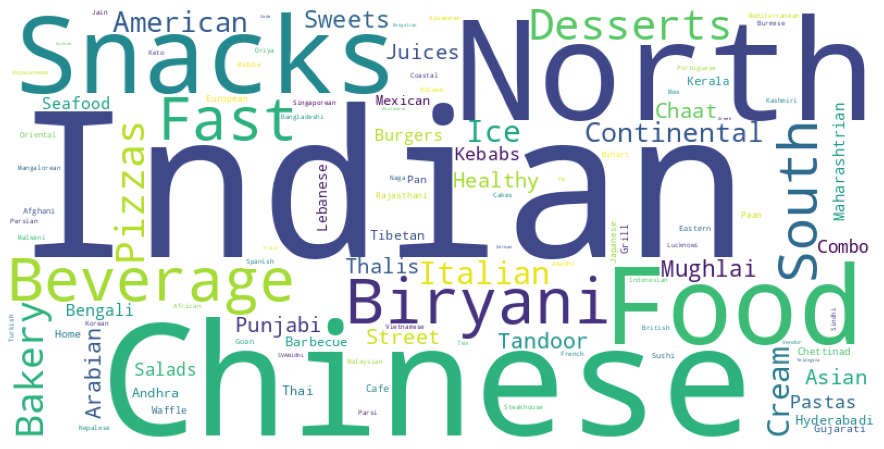

In [42]:
wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(word_cloud)
plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc);

This world cloud shows mostly restaurants are offering **Chinese** and **North Indian**.

## ASK & ANSWER THE QUESTIONS

#### Q1. List the Popular Cuisines in the restaurants?

In [45]:
a = []
for i in df['cuisine'].values:
    try:
        for j in i.split(','):
            a.append(j)
            
    except:
        a.append(i) 
        
popular_cuisine_df = pd.DataFrame({"all_cuisine":a}).value_counts()
popular_cuisine_df.head(10)

all_cuisine 
Chinese         36451
North Indian    32530
Indian          25703
Snacks          17225
Biryani         14521
Beverages       14269
Fast Food       13890
South Indian    12011
Desserts        11191
Pizzas           9844
dtype: int64

##### From the above listed the popular cuisines are:

- **Chinese - Ist - 36451 restaurants**
- **North Indian - IInd - 32530 restaurants**
- **Indian - IIIrd - 25703 restaurants**

#### Q2.  List out the Restaurant's lies between 1.0 to 5.0 ratings

In [48]:
rating_groups = df.groupby('rating', as_index = False).agg('count').rename({'name':'R_Counts'}, axis=1)[['rating','R_Counts']]

rating_groups = {
    '1.0-2.0':rating_groups[(rating_groups['rating']>1.0) & (rating_groups['rating']<=2.0)].R_Counts.sum(),
    '2.1-3.0':rating_groups[(rating_groups['rating']>2.0) & (rating_groups['rating']<=3.0)].R_Counts.sum(),
    '3.1-4.0':rating_groups[(rating_groups['rating']>3.0) & (rating_groups['rating']<=4.0)].R_Counts.sum(),
    '4.1-5.0':rating_groups[(rating_groups['rating']>4.0) & (rating_groups['rating']<=5.0)].R_Counts.sum()
    }

rating_groups = pd.DataFrame((rating_groups.keys(),rating_groups.values()), index=['Rating', 'Counts']).T

In [49]:
fig = px.pie(rating_groups,
       names='Rating',
       values='Counts',
       labels={'Counts':'Restaurant Counts'},
       color_discrete_sequence=px.colors.sequential.Plasma,
       hole=.5,
       title='Restaurants Ratings b/w 1.0 - 5.0'
      )

fig.show()

Only 5% of restaurants are rated below 3.1 rating.

#### Q3. Sub-Divison of Chennai with the maximum number of restaurants listed on Swiggy?

In [51]:
chennai_sub=df[df.city == 'Chennai'].groupby('city_division')['name'].count().sort_values(ascending=False).reset_index(name='Restaurants counts')
chennai_sub.head().style.background_gradient()

In [52]:
fig =px.bar(chennai_sub.head(25),
            x= 'city_division',
            y= 'Restaurants counts',
            labels = {'city_division':'Top 25 Restaurants in Chennai City','Restaurants counts':'Restaurants Counts'},
            color_discrete_sequence = px.colors.qualitative.G10_r,
            title='<b>Top 25 Subregion of Chennai Restaurants')

fig.show()

The above graphs shows that Top 25 restaurants of Chennai's Sub-Divison

#### Q4. Sub-Divison of Chennai with the least number of restaurants listed on Swiggy?

In [53]:
chennai_sub=df[df.city == 'Chennai'].groupby('city_division')['name'].count().sort_values(ascending=True
                                                                                         ).reset_index(name='Restaurants counts')
chennai_sub.head().style.background_gradient()

In [54]:
fig =px.bar(chennai_sub.head(25),
            x= 'city_division',
            y= 'Restaurants counts',
            labels = {'city_division':'Least 25 Restaurants in Chennai City','Restaurants counts':'Restaurants Counts'},
            color_discrete_sequence = px.colors.qualitative.G10_r,
            title='<b>Least 25 Subregion of Chennai Restaurants')

fig.show()

The above graphs shows that Least of Top 25 restaurants of Chennai's Sub-Divison

#### Q5. Rating vs Cost of the restaurants?

In [55]:
fig = px.box(df.query("rating != 0"),
             x='rating',
             y='cost',
             color='rating',
             title='Rating vs Cost')
fig.show()

Most of the high average cost restaurants are rated above 4 rating.

#### Q6. List out the least number of restaurents of 25 cities?

In [57]:
least = df.city.value_counts(ascending=True).reset_index().rename({'index':'city', 'city':'Counts'}, axis=1)

least.sort_values(by='Counts')[:25]

city  Counts
0             Manali       1
1              Hampi       1
2             Rangpo       1
3             Kohima       1
4         Naharlagun       1
5           Itanagar       2
6          Mount-abu       2
7             Boisar       2
13        Ranibennur       3
12           Dhanbad       3
11  Mandi-gobindgarh       3
8           Bilimora       3
9         Darjeeling       3
10            Dahanu       3
14       Murshidabad       4
15             Kumta       4
16     Bodinayakanur       5
19         Kasaragod       6
17        Thiruvalla       6
18           Budhwal       6
20         Kundapura       7
21  Tarn-taran-sahib       7
22           Lonavla       7
23    Srivilliputhur       7
24      Bodhan-rural       8

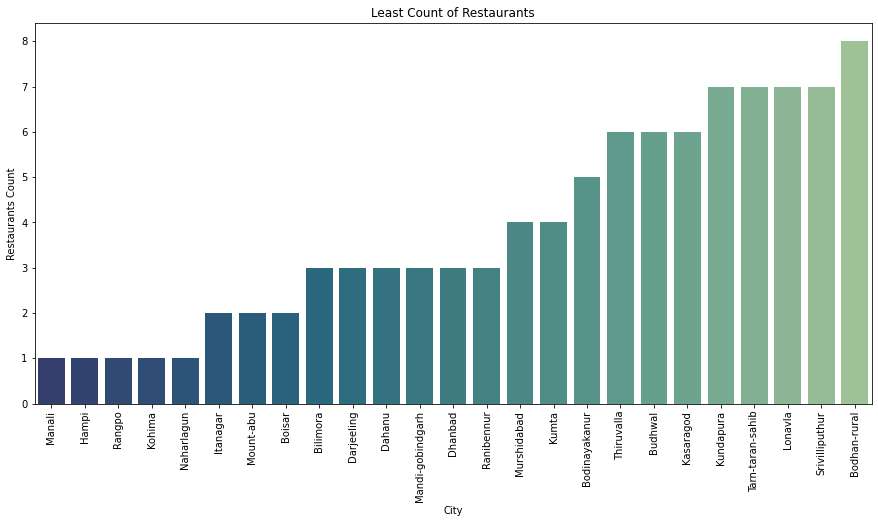

In [58]:
plt.figure(figsize=(15,7))                                       

sns.barplot(data = least.head(25),
           x='city',
           y ='Counts',
           palette= "crest_r")                 

plt.xticks(rotation = 90)                                     

plt.xlabel("City")                                                       
plt.ylabel("Restaurants Count")                                  
plt.title('Least Count of Restaurants')        
plt.show()

Low populated cities have lowest resturants are listed above.

#### Q7. Which are those Cities that have highest number of rating count given by people ?

In [59]:
rating_count = df.groupby('city')['rating_count'].sum().sort_values(ascending=False).head(25)

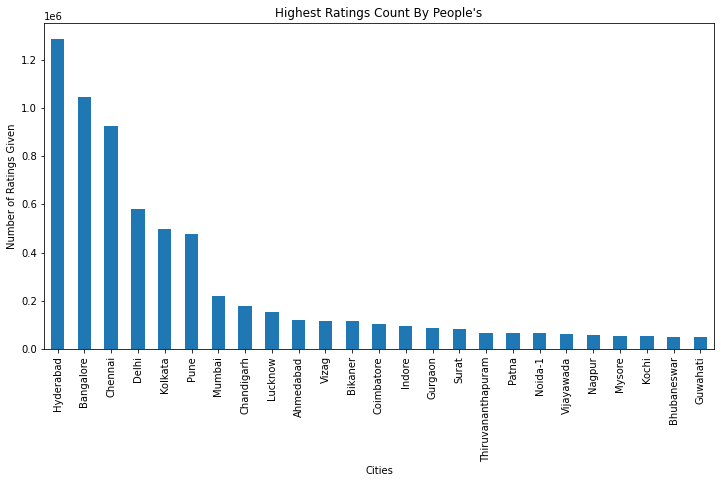

In [60]:
plt.figure(figsize=(12, 6))
rating_count.plot.bar()
plt.title("Highest Ratings Count By People's")
plt.xlabel('Cities')
plt.ylabel('Number of Ratings Given')
plt.show()

Hyderabad is the city that have highest number of rating count given by peoples

### Q8. Which are those Restaurants that has maximum number of branches ?


In [62]:
restaurn_chain_df = df[['name']].value_counts().sort_values(ascending=False).head(10)

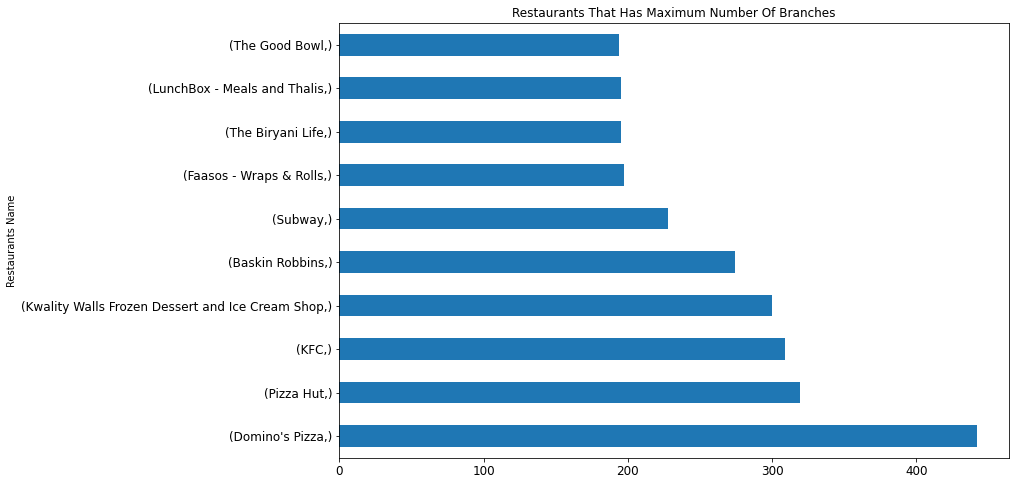

In [63]:
pd.options.plotting.backend = 'matplotlib'
restaurn_chain_df.plot(kind = 'barh', legend = False, 
                 title = 'Restaurants That Has Maximum Number Of Branches',
                 xlabel = 'Restaurants Name',
                 ylabel = 'Number of Branches',
                 figsize = (12,8),
                 fontsize = 12);

* `Domino's Pizza` has 442 branches which is maximum among all the restaurants in India.
* On second position we have `Pizza Hut` and then `KFC`. There is not a big difference between Pizza Hut and KFC in terms of branches. 

## CONCLUSION

- Chinese is the most common cuisines in the restaurantss
- 54.5% secured the ratings b/w 3.1-4.0
- AnnaNagar has the maximum number of restaurants in Sub-divisions of Chennai
- Alwarpet has the least count of restaurants in Sub-divisions of Chennai
- Restaurants has gained a highest number of ratings of 4.4 at the Maximum cost of 3000 
- Manali has the least number of restaurants
- Hyderabad is the city that have highest number of rating count given by peoples
- Domino's Pizza has 442 branches which is maximum among all the restaurants in India.

## SCOPE OF FUTURE WORK

- Find similar dataset and take new columns from it.
- Understand the cuisines loved more around a specific region or city.
- Analising the menu data's

## REFERENCES

* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
* opendatasets Python library: https://github.com/JovianML/opendatasets
* Kaggle open datasets - https://www.kaggle.com/datasets